In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/tcga-xena-hub.s3.us-east-1.amazonaws.com_download_survival2FBRCA_survival.txt
/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_BRCA_clinicalMatrix
/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_HiSeqV2_percentile/HiSeqV2_percentile


# Load Libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Load Data

TCGA breast invasive carcinoma (BRCA) gene expression by RNAseq (polyA+ IlluminaHiSeq percentile)


Goldman, M.J., Craft, B., Hastie, M. et al. Visualizing and interpreting cancer genomics data via the Xena platform. Nat Biotechnol (2020). https://doi.org/10.1038/s41587-020-0546-8

In [3]:
# load data
# load gene expression data
geneExpressionData = pd.read_csv('/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_HiSeqV2_percentile/HiSeqV2_percentile', sep='\t')
geneExpressionData

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,67.6890,43.2552,64.3948,60.4877,69.7906,71.5039,76.8329,61.6060,74.6299,...,69.7743,78.4623,74.3606,74.1559,75.9240,92.7702,83.8835,66.2846,87.8746,80.0284
1,HIF3A,7.3010,18.8283,11.5102,6.7588,1.5644,1.1943,18.0518,1.5093,13.3623,...,47.7255,9.5156,15.6451,47.7195,3.7018,8.3572,17.8496,37.6901,1.9467,11.8370
2,RNF17,0.0000,3.7593,1.3625,0.0000,0.0000,5.9261,0.0000,0.0000,0.0000,...,0.0000,0.0000,14.9662,0.0000,0.0000,7.3560,0.9961,0.0000,0.0000,0.0000
3,RNF10,91.0699,93.9684,95.1058,98.4396,95.2534,94.4729,92.0332,93.0050,96.6537,...,94.9079,96.2191,96.3634,94.6336,95.6244,93.2273,95.1562,92.9888,96.2317,96.1641
4,RNF11,89.1384,98.9692,92.1185,89.0831,90.5039,86.9705,86.0673,82.2452,91.1042,...,94.6150,91.6460,82.0761,93.2331,86.7963,79.4324,86.3168,94.8982,86.2539,90.5849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,PTRF,98.9073,84.0504,98.1215,96.5183,91.1427,97.6769,94.7756,97.9389,96.4251,...,99.5252,96.1543,97.7521,99.6153,91.2231,90.5351,97.8855,98.5967,97.2502,68.2368
20526,BCL6B,39.3524,41.4333,48.9083,43.9916,42.9497,55.1052,45.1142,58.7902,49.1513,...,71.9436,40.4618,46.5099,62.4350,43.0143,52.5380,60.3335,55.2905,55.1330,30.8348
20527,GSTK1,91.4665,64.3905,91.5427,90.9078,84.9885,82.7917,85.8714,92.4218,93.0588,...,93.4067,92.2550,88.5831,92.1538,86.0144,87.8372,90.4633,87.9391,95.3762,93.3646
20528,SELP,43.8659,0.0000,49.5639,37.7132,36.9314,27.8604,33.2326,18.4323,56.6011,...,75.1564,37.2871,19.8873,71.1392,48.2145,29.1071,53.6115,67.6879,25.2692,8.0295


Curated survival data from the Pan-cancer Atlas paper titled "An Integrated TCGA Pan-Cancer Clinical Data Resource (TCGA-CDR) to drive high quality survival outcome analytics". The paper highlights four types of carefully curated survival endpoints, and recommends the use of the endpoints of OS, PFI, DFI, and DSS for each TCGA cancer type.


OS: overall survial

PFI: progression-free interval

DSS: disease-specific survival

DFI: disease-free interval

In [4]:
# load survival data
survivalData = pd.read_csv('/kaggle/input/breast-cancer/tcga-xena-hub.s3.us-east-1.amazonaws.com_download_survival2FBRCA_survival.txt', sep='\t')
survivalData

,sample,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-3C-AAAU-01,TCGA-3C-AAAU,0,4047.0,0.0,4047.0,1.0,1808.0,1,1808.0,NaN
1,TCGA-3C-AALI-01,TCGA-3C-AALI,0,4005.0,0.0,4005.0,0.0,4005.0,0,4005.0,NaN
2,TCGA-3C-AALJ-01,TCGA-3C-AALJ,0,1474.0,0.0,1474.0,0.0,1474.0,0,1474.0,NaN
3,TCGA-3C-AALK-01,TCGA-3C-AALK,0,1448.0,0.0,1448.0,NaN,NaN,0,1448.0,NaN
4,TCGA-4H-AAAK-01,TCGA-4H-AAAK,0,348.0,0.0,348.0,0.0,348.0,0,348.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1231,TCGA-WT-AB44-01,TCGA-WT-AB44,0,883.0,0.0,883.0,0.0,883.0,0,883.0,NaN
1232,TCGA-XX-A899-01,TCGA-XX-A899,0,467.0,0.0,467.0,0.0,467.0,0,467.0,NaN
1233,TCGA-XX-A89A-01,TCGA-XX-A89A,0,488.0,0.0,488.0,0.0,488.0,0,488.0,NaN
1234,TCGA-Z7-A8R5-01,TCGA-Z7-A8R5,0,3287.0,0.0,3287.0,NaN,NaN,1,181.0,NaN


BRCA_clinicalMatrix

In [5]:
clinicalData = pd.read_csv('/kaggle/input/breast-cancer/TCGA.BRCA.sampleMap_BRCA_clinicalMatrix', sep='\t')
clinicalData

,sampleID,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,...,_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray
0,TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,NaN,TCGA-3C-AAAU-01A-11D-A41E-01,TCGA-3C-AAAU-01,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,TCGA-3C-AAAU-01A-11D-A41E-01,NaN
1,TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,NaN,TCGA-3C-AALI-01A-11D-A41E-01,TCGA-3C-AALI-01,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,TCGA-3C-AALI-01A-11D-A41E-01,NaN
2,TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,NaN,TCGA-3C-AALJ-01A-31D-A41E-01,TCGA-3C-AALJ-01,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,TCGA-3C-AALJ-01A-31D-A41E-01,NaN
3,TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1a19e068-d213-41ef-aebb-104017a883cc,NaN,TCGA-3C-AALK-01A-11D-A41E-01,TCGA-3C-AALK-01,NaN,1a19e068-d213-41ef-aebb-104017a883cc,TCGA-3C-AALK-01A-11D-A41E-01,NaN
4,TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,NaN,TCGA-4H-AAAK-01A-12D-A41E-01,TCGA-4H-AAAK-01,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,TCGA-4H-AAAK-01A-12D-A41E-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,TCGA-XX-A899-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8e339298-3e3c-4b31-96a9-a842e973e583,NaN,TCGA-XX-A899-01A-11D-A36I-01,TCGA-XX-A899-01,NaN,8e339298-3e3c-4b31-96a9-a842e973e583,TCGA-XX-A899-01A-11D-A36I-01,NaN
1243,TCGA-XX-A899-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,TCGA-XX-A89A-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,501a70d8-3932-49c0-aa13-774756fb89e3,NaN,TCGA-XX-A89A-01A-11D-A36I-01,TCGA-XX-A89A-01,NaN,501a70d8-3932-49c0-aa13-774756fb89e3,TCGA-XX-A89A-01A-11D-A36I-01,NaN
1245,TCGA-Z7-A8R5-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43c6d23b-2fcd-499e-82ef-10f15d8ede90,NaN,TCGA-Z7-A8R5-01A-42D-A41E-01,TCGA-Z7-A8R5-01,NaN,43c6d23b-2fcd-499e-82ef-10f15d8ede90,TCGA-Z7-A8R5-01A-42D-A41E-01,NaN


In [6]:
geneExpressionData

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,67.6890,43.2552,64.3948,60.4877,69.7906,71.5039,76.8329,61.6060,74.6299,...,69.7743,78.4623,74.3606,74.1559,75.9240,92.7702,83.8835,66.2846,87.8746,80.0284
1,HIF3A,7.3010,18.8283,11.5102,6.7588,1.5644,1.1943,18.0518,1.5093,13.3623,...,47.7255,9.5156,15.6451,47.7195,3.7018,8.3572,17.8496,37.6901,1.9467,11.8370
2,RNF17,0.0000,3.7593,1.3625,0.0000,0.0000,5.9261,0.0000,0.0000,0.0000,...,0.0000,0.0000,14.9662,0.0000,0.0000,7.3560,0.9961,0.0000,0.0000,0.0000
3,RNF10,91.0699,93.9684,95.1058,98.4396,95.2534,94.4729,92.0332,93.0050,96.6537,...,94.9079,96.2191,96.3634,94.6336,95.6244,93.2273,95.1562,92.9888,96.2317,96.1641
4,RNF11,89.1384,98.9692,92.1185,89.0831,90.5039,86.9705,86.0673,82.2452,91.1042,...,94.6150,91.6460,82.0761,93.2331,86.7963,79.4324,86.3168,94.8982,86.2539,90.5849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,PTRF,98.9073,84.0504,98.1215,96.5183,91.1427,97.6769,94.7756,97.9389,96.4251,...,99.5252,96.1543,97.7521,99.6153,91.2231,90.5351,97.8855,98.5967,97.2502,68.2368
20526,BCL6B,39.3524,41.4333,48.9083,43.9916,42.9497,55.1052,45.1142,58.7902,49.1513,...,71.9436,40.4618,46.5099,62.4350,43.0143,52.5380,60.3335,55.2905,55.1330,30.8348
20527,GSTK1,91.4665,64.3905,91.5427,90.9078,84.9885,82.7917,85.8714,92.4218,93.0588,...,93.4067,92.2550,88.5831,92.1538,86.0144,87.8372,90.4633,87.9391,95.3762,93.3646
20528,SELP,43.8659,0.0000,49.5639,37.7132,36.9314,27.8604,33.2326,18.4323,56.6011,...,75.1564,37.2871,19.8873,71.1392,48.2145,29.1071,53.6115,67.6879,25.2692,8.0295


In [7]:
geneExpressionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20530 entries, 0 to 20529
Columns: 1219 entries, sample to TCGA-B6-A0X1-01
dtypes: float64(1218), object(1)
memory usage: 190.9+ MB


In [8]:
from pandas_profiling import ProfileReport
start_time = time.time()
profile = ProfileReport(survivalData)
profile.to_file('survivalData profile_report.html')
print('%s seconds' % (time.time() - start_time))
# profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

22.575763463974 seconds


In [9]:
"""
# pandas gags on this dataset - too big
# profile = ProfileReport(geneExpressionData)
# profile.to_file('geneExpressionData profile_report.html')
# profile
"""

"\n# pandas gags on this dataset - too big\n# profile = ProfileReport(geneExpressionData)\n# profile.to_file('geneExpressionData profile_report.html')\n# profile\n"

# Data Pre-processing

In [10]:
# join datasets together
# print(geneExpressionData)
gene_samples = geneExpressionData['sample'].unique()
gene_samples.sort()
print('gene_samples\n', gene_samples)
print(gene_samples.shape)
pd.DataFrame(gene_samples).to_csv("gene_samples.csv")

survival_samples = survivalData['sample'].unique()
print('survival_samples\n', survival_samples)

clinical_samples = clinicalData['sampleID'].unique()
print('clinical_samples\n', clinical_samples)


gene_samples
 ['?|100130426' '?|100133144' '?|100134869' ... 'ZZZ3' 'psiTPTE22' 'tAKR']
(20530,)
survival_samples
 ['TCGA-3C-AAAU-01' 'TCGA-3C-AALI-01' 'TCGA-3C-AALJ-01' ...
 'TCGA-XX-A89A-01' 'TCGA-Z7-A8R5-01' 'TCGA-Z7-A8R6-01']
clinical_samples
 ['TCGA-3C-AAAU-01' 'TCGA-3C-AALI-01' 'TCGA-3C-AALJ-01' ...
 'TCGA-XX-A89A-01' 'TCGA-Z7-A8R5-01' 'TCGA-Z7-A8R6-01']


Observation: in the gene expression dataset, the sample IDs are in the column names, and gene IDs are in the 'sample' column, so...

We'll need to transpose the gene dataset in order to combine it with survival and clinical data

In [11]:
# transpose the gene dataset...
geneTranspose = geneExpressionData.set_index('sample')
geneTranspose = geneTranspose.transpose()
geneTranspose.reset_index(names='sampleID', inplace=True)
print(geneTranspose.info())
geneTranspose


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Columns: 20531 entries, sampleID to SELS
dtypes: float64(20530), object(1)
memory usage: 190.8+ MB
None


sample,sampleID,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-AR-A5QQ-01,67.6890,7.3010,0.0000,91.0699,89.1384,75.0670,92.6020,15.0357,0.0000,...,1.5121,0.0000,25.1184,1.5121,62.4337,98.9073,39.3524,91.4665,43.8659,85.0842
1,TCGA-D8-A1JA-01,43.2552,18.8283,3.7593,93.9684,98.9692,85.6586,95.8567,13.9978,0.0000,...,6.6900,0.0000,16.2413,19.4433,73.2459,84.0504,41.4333,64.3905,0.0000,76.9937
2,TCGA-BH-A0BQ-01,64.3948,11.5102,1.3625,95.1058,92.1185,81.8710,97.7339,20.2297,0.0000,...,0.0000,11.5102,18.4140,0.0000,62.9041,98.1215,48.9083,91.5427,49.5639,74.4570
3,TCGA-BH-A0BT-01,60.4877,6.7588,0.0000,98.4396,89.0831,81.6024,97.4619,13.5772,0.0000,...,0.0000,14.5862,20.6344,0.0000,57.1510,96.5183,43.9916,90.9078,37.7132,65.8680
4,TCGA-A8-A06X-01,69.7906,1.5644,0.0000,95.2534,90.5039,77.8376,97.4833,20.2904,8.7005,...,6.1543,1.5644,16.8273,0.0000,64.5206,91.1427,42.9497,84.9885,36.9314,89.7587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,TCGA-A2-A3XT-01,92.7702,8.3572,7.3560,93.2273,79.4324,74.6340,96.7665,20.0768,10.9821,...,10.4521,12.7685,25.7558,0.0000,65.3346,90.5351,52.5380,87.8372,29.1071,86.4855
1214,TCGA-B6-A0X7-01,83.8835,17.8496,0.9961,95.1562,86.3168,82.5972,98.0790,22.8954,0.0000,...,5.5154,24.7965,15.6611,0.0000,63.9336,97.8855,60.3335,90.4633,53.6115,69.5429
1215,TCGA-BH-A1EV-11,66.2846,37.6901,0.0000,92.9888,94.8982,89.5175,97.9566,23.0468,3.3921,...,8.1191,26.3760,18.9353,1.2912,74.4474,98.5967,55.2905,87.9391,67.6879,70.3551
1216,TCGA-3C-AALJ-01,87.8746,1.9467,0.0000,96.2317,86.2539,68.2448,97.7798,21.0993,0.0000,...,0.0000,1.9467,17.6774,5.0922,64.3805,97.2502,55.1330,95.3762,25.2692,78.0917


In [12]:
geneColNames = list(geneTranspose.columns)
geneColNames.remove('sampleID')
geneColNames

['ARHGEF10L',
 'HIF3A',
 'RNF17',
 'RNF10',
 'RNF11',
 'RNF13',
 'GTF2IP1',
 'REM1',
 'MTVR2',
 'RTN4RL2',
 'C16orf13',
 'C16orf11',
 'FGFR1OP2',
 'TSKS',
 'ATRX',
 'PMM2',
 'LOC100272146',
 'ASS1',
 'NCBP1',
 'ZNF709',
 'ZNF708',
 'RBM14',
 'NCBP2',
 'DISC1',
 'CAMK1',
 'RPL37',
 'SPR',
 'ZNF700',
 'ZNF707',
 'CAMK4',
 'ZNF704',
 'LOC339240',
 'GOLGA6B',
 'RNF115',
 'RNF112',
 'ZC3H14',
 'SPN',
 'HMGCLL1',
 'NACAP1',
 'LRRTM1',
 'GRIN1',
 'RBMY1A3P',
 'DHX8',
 'DHX9',
 'LOC441204',
 'TCOF1',
 'LRRTM3',
 'NUP98',
 'XPC',
 'SLC12A2',
 'GRINA',
 'LRRTM2',
 'NUP93',
 'HAP1',
 'KLRA1',
 'CAMKV',
 'SPPL3',
 'GOLIM4',
 'ZNF646',
 'OPA3',
 'OPA1',
 'RHEB',
 'RAB40C',
 'RAB40B',
 'RAB40A',
 'COL7A1',
 'MDP1',
 'GTSE1',
 'FAM183A',
 'ARFRP1',
 'OVCH1',
 'FAM183B',
 'PSAP',
 'KIAA0831',
 'SPPL2A',
 'SLC46A1',
 'TGFBR2',
 'ITGA8',
 'ITGA9',
 'STK40',
 'MYO3B',
 'ATP2A1',
 'ATP2A2',
 'ATP2A3',
 'ITGA1',
 'ITGA2',
 'ITGA3',
 'ITGA4',
 'ITGA5',
 'ITGA6',
 'ITGA7',
 'TRHR',
 'LOC100132288',
 'DENND4A

In [13]:
# looks like the clinial and survival datasets have an easy join
# the join columns need to have the same name to use the merge function...
# so will copy the 'sample' column in survival data to a new 'sampleID' column
mergeSurvival = survivalData.copy()
mergeSurvival['sampleID'] = mergeSurvival['sample']
mergeSurvival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     1236 non-null   object 
 1   _PATIENT   1236 non-null   object 
 2   OS         1236 non-null   int64  
 3   OS.time    1235 non-null   float64
 4   DSS        1206 non-null   float64
 5   DSS.time   1235 non-null   float64
 6   DFI        1055 non-null   float64
 7   DFI.time   1054 non-null   float64
 8   PFI        1236 non-null   int64  
 9   PFI.time   1235 non-null   float64
 10  Redaction  6 non-null      object 
 11  sampleID   1236 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 116.0+ KB


In [14]:
# now that clinial and survival datasets both have a sampleID column, we can merge...
mergeSurvivalClinical = pd.merge(clinicalData, mergeSurvival, on='sampleID')
print(mergeSurvivalClinical.info())
mergeSurvivalClinical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Columns: 205 entries, sampleID to Redaction
dtypes: float64(40), int64(3), object(162)
memory usage: 1.9+ MB
None


,sampleID,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,...,_PATIENT_y,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-3C-AAAU,0,4047.0,0.0,4047.0,1.0,1808.0,1,1808.0,NaN
1,TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-3C-AALI,0,4005.0,0.0,4005.0,0.0,4005.0,0,4005.0,NaN
2,TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-3C-AALJ,0,1474.0,0.0,1474.0,0.0,1474.0,0,1474.0,NaN
3,TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-3C-AALK,0,1448.0,0.0,1448.0,NaN,NaN,0,1448.0,NaN
4,TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-4H-AAAK,0,348.0,0.0,348.0,0.0,348.0,0,348.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,TCGA-WT-AB44-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-WT-AB44,0,883.0,0.0,883.0,0.0,883.0,0,883.0,NaN
1232,TCGA-XX-A899-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-XX-A899,0,467.0,0.0,467.0,0.0,467.0,0,467.0,NaN
1233,TCGA-XX-A89A-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-XX-A89A,0,488.0,0.0,488.0,0.0,488.0,0,488.0,NaN
1234,TCGA-Z7-A8R5-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-Z7-A8R5,0,3287.0,0.0,3287.0,NaN,NaN,1,181.0,NaN


In [15]:
# Merge the Survival+Clinical dataset with the gene expression dataset
mergeSurvivalClinicalGene = pd.merge(mergeSurvivalClinical, geneTranspose, on='sampleID')
print(mergeSurvivalClinicalGene.info())
mergeSurvivalClinicalGene

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Columns: 20735 entries, sampleID to SELS
dtypes: float64(20570), int64(3), object(162)
memory usage: 192.2+ MB
None


,sampleID,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,11.7185,18.3705,0.0000,58.6347,92.0046,43.6578,96.3980,27.3122,71.1417
1,TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5648,7.6005,22.6784,14.7138,66.1953,96.1381,47.7344,85.0034,26.1258,76.5543
2,TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,1.9467,17.6774,5.0922,64.3805,97.2502,55.1330,95.3762,25.2692,78.0917
3,TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7288,6.9889,19.2586,0.0000,65.0081,98.1996,45.0692,91.7595,53.7632,79.0866
4,TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9732,4.1373,17.8535,0.0000,59.0134,98.5536,41.0463,87.3693,26.3497,76.3043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,TCGA-WT-AB44-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,16.8424,0.0000,59.2135,98.7620,43.3731,95.4122,25.7501,77.4949
1211,TCGA-XX-A899-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4445,12.9591,21.5595,0.0000,63.9230,98.1582,54.2863,91.5356,59.3839,74.0763
1212,TCGA-XX-A89A-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9604,19.4251,22.4198,13.7790,66.1708,98.9366,54.7558,86.1206,45.1214,79.5786
1213,TCGA-Z7-A8R5-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5439,5.6076,28.3488,0.0000,52.7339,98.2849,49.1125,96.3044,61.1980,81.1797


# Exploratory Data Analysis

<Axes: xlabel='sample'>

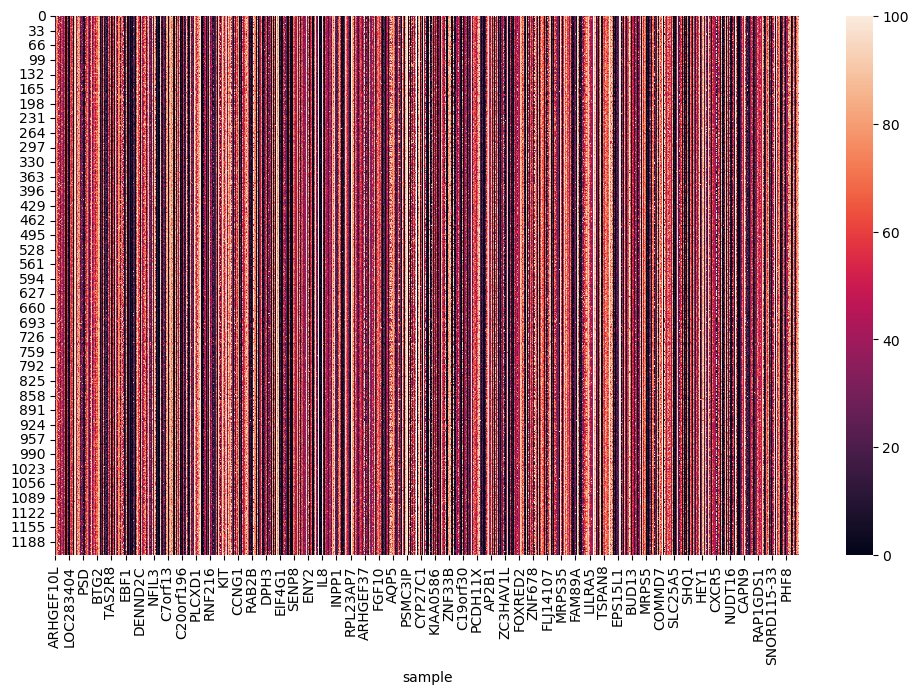

In [16]:
# heatmap of gene expression data
# Python program to generate heatmap which 
# represents panda dataframe in color-coding schemes
# along with values mentioned in each cell
  
# import required libraries
import pandas as pd
import seaborn as sns
  
# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (12, 7))
  
sns.heatmap(geneTranspose.iloc[:, 1:])

sample  KRTAP22-1  TTTY13  SNORD116-23  SNORD116-25  SNAR-H  SNORD116-24  \
0             0.0     0.0          0.0          0.0     0.0          0.0   
1             0.0     0.0          0.0          0.0     0.0          0.0   
2             0.0     0.0          0.0          0.0     0.0          0.0   
3             0.0     0.0          0.0          0.0     0.0          0.0   
4             0.0     0.0          0.0          0.0     0.0          0.0   
...           ...     ...          ...          ...     ...          ...   
1213          0.0     0.0          0.0          0.0     0.0          0.0   
1214          0.0     0.0          0.0          0.0     0.0          0.0   
1215          0.0     0.0          0.0          0.0     0.0          0.0   
1216          0.0     0.0          0.0          0.0     0.0          0.0   
1217          0.0     0.0          0.0          0.0     0.0          0.0   

sample  PRR20A  SNAR-C3  SNORA11C  SNORD12  ...  ?|136542  ?|340602  ?|10431  \
0      

Text(0.5, 47.7222222222222, 'Gene')

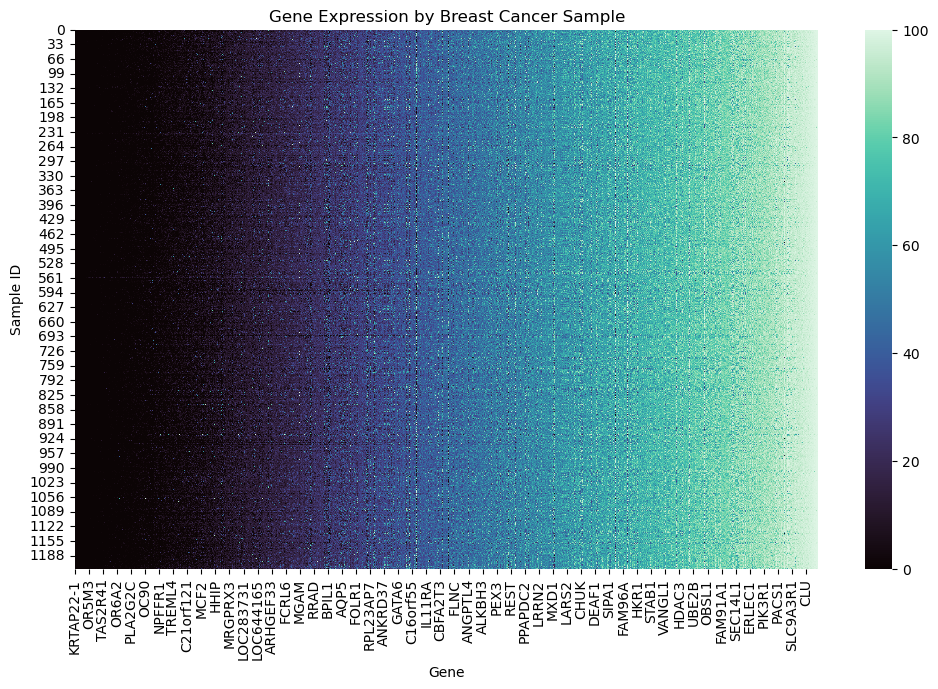

In [17]:
# gene expression heatmap, genes sorted by average expression percentile
geneAvgExpression = geneTranspose.iloc[:, 1:].mean(axis=0)
geneAvgExpression.sort_values()

geneByAvgExp = geneTranspose.reindex(geneTranspose.iloc[:, 1:].mean().sort_values().index, axis=1)
print(geneByAvgExp)

# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (12, 7))

ax.set_title('Gene Expression by Breast Cancer Sample')
sns.color_palette("mako", as_cmap=True)
sns.heatmap(geneByAvgExp, cmap="mako")

plt.ylabel('Sample ID')
plt.xlabel('Gene')



In [18]:
# find and handle blanks / NaNs
mergeSurvivalClinicalGene.isna().sum().sort_values(ascending=False)[lambda x : x > 0]

?|136542                            1215
?|652919                            1215
?|729884                            1215
?|155060                            1215
?|388795                            1215
                                    ... 
PFI.time                               1
DSS.time                               1
histological_type                      1
OS.time                                1
history_of_neoadjuvant_treatment       1
Length: 200, dtype: int64

# Feature Engineering

In [19]:
!pip install scikit-learn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
!pip install fast-ml
from fast_ml.model_development import train_valid_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.4 MB/s eta 0:00:00


# Cross Validation

In [20]:
# Data Split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(mergeSurvivalClinicalGene, target = 'OS', train_size=0.7, valid_size=0.2, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(850, 20734)
(850,)
(243, 20734)
(243,)
(122, 20734)
(122,)


(None, None)

In [21]:
print(X_train['OS.time'])

812      431.0
280      197.0
97       595.0
363      618.0
396      754.0
         ...  
1062      24.0
911      707.0
190      577.0
310       10.0
1013    1063.0
Name: OS.time, Length: 850, dtype: float64


In [22]:
# Encoding Clinical dataset categorical features
# start with select ordinal features... ER_Status_nature2012
# work with a copy of the dataset...
ordFeatures_train = pd.DataFrame(X_train.AJCC_Stage_nature2012).copy() # start with a couple...
ordFeatures_valid = pd.DataFrame(X_valid.AJCC_Stage_nature2012).copy() # start with a couple...

ordFeatures_train.replace(np.nan, 'Unknown', inplace=True)
ordFeatures_valid.replace(np.nan, 'Unknown', inplace=True)

print('ordFeatures_train:\n', ordFeatures_train)

# get unique values from training set
AJCC_Stage_nature2012_LOV = ordFeatures_train.AJCC_Stage_nature2012.unique()
print('AJCC_Stage_nature2012_LOV:\n', AJCC_Stage_nature2012_LOV)

# set the ordinal sequence
ordinal_encoder = OrdinalEncoder(categories=[[
    'Stage I','Stage IA','Stage IB', 'Stage II','Stage IIA','Stage IIB','Stage III','Stage IIIA','Stage IIIB','Stage IIIC','Stage IV','Stage X','Unknown']])

# fit the encoder to the training data
ordinal_encoder.fit(ordFeatures_train)

# transform the data
ordFeatures_train = pd.DataFrame(ordinal_encoder.transform(ordFeatures_train), index=X_train.index)
ordFeatures_valid = pd.DataFrame(ordinal_encoder.transform(ordFeatures_valid), index=X_valid.index)

# set the column name for the transformed data
ordFeatures_train.columns = ordinal_encoder.get_feature_names_out()
ordFeatures_valid.columns = ordinal_encoder.get_feature_names_out()

# take a look at the data
print('ordFeatures_train:\n', ordFeatures_train)
print('ordFeatures_train:\n', ordFeatures_train.describe())
print('ordFeatures_valid:\n', ordFeatures_valid)
print('ordFeatures_valid:\n', ordFeatures_valid.describe())

ordFeatures_train:
      AJCC_Stage_nature2012
812              Stage IIA
280                Unknown
97              Stage IIIA
363              Stage IIB
396             Stage IIIA
...                    ...
1062               Unknown
911                Unknown
190              Stage IIB
310              Stage IIA
1013            Stage IIIC

[850 rows x 1 columns]
AJCC_Stage_nature2012_LOV:
 ['Stage IIA' 'Unknown' 'Stage IIIA' 'Stage IIB' 'Stage IIIB' 'Stage III'
 'Stage IIIC' 'Stage IA' 'Stage II' 'Stage IV' 'Stage IB' 'Stage I'
 'Stage X']
ordFeatures_train:
       AJCC_Stage_nature2012
812                     4.0
280                    12.0
97                      7.0
363                     5.0
396                     7.0
...                     ...
1062                   12.0
911                    12.0
190                     5.0
310                     4.0
1013                    9.0

[850 rows x 1 columns]
ordFeatures_train:
        AJCC_Stage_nature2012
count             850.

In [23]:
# encoding nominal features...,
nomFeatureColNames = ['ER_Status_nature2012', 'HER2_Final_Status_nature2012','Metastasis_nature2012','Node_nature2012','Tumor_nature2012']

# work with a copy of the dataset...
nominalFeatures_train = X_train[nomFeatureColNames].copy()
nominalFeatures_valid = X_valid[nomFeatureColNames].copy() 
print('\nnominalFeatures_train:\n', nominalFeatures_train)
# print(nominalFeatures.describe())

# replace all NaN values with 'Unknown'
nominalFeatures_train = nominalFeatures_train.replace(np.nan, 'Unknown')
nominalFeatures_valid = nominalFeatures_valid.replace(np.nan, 'Unknown')
# print(nominalFeatures)

# create one hot encoder
nominal_encoder = OneHotEncoder(drop='first', sparse_output=True)

# apply the one hot encoder 
nominalFeaturesOHE_train = pd.DataFrame(nominal_encoder.fit_transform(nominalFeatures_train).toarray(), index=X_train.index)
nominalFeaturesOHE_train.columns = nominal_encoder.get_feature_names_out()
nominalFeaturesOHE_valid = pd.DataFrame(nominal_encoder.transform(nominalFeatures_valid).toarray(), index=X_valid.index)
nominalFeaturesOHE_valid.columns = nominal_encoder.get_feature_names_out()

# print(nominalFeaturesOHE.columns)
# print(nominalFeaturesOHE.info())

# take a look at the one hot encoded features...
print('\nnominalFeaturesOHE_train:\n', nominalFeaturesOHE_train)
print('\nnominalFeaturesOHE_train:\n', nominalFeaturesOHE_train.describe())
print('\nnominalFeaturesOHE_valid:\n', nominalFeaturesOHE_valid)
print('\nnominalFeaturesOHE_valid:\n', nominalFeaturesOHE_valid.describe())


nominalFeatures_train:
      ER_Status_nature2012 HER2_Final_Status_nature2012 Metastasis_nature2012  \
812              Negative                     Negative                    M0   
280                   NaN                          NaN                   NaN   
97               Positive                     Negative                    M0   
363              Positive                     Negative                    M0   
396              Positive                     Positive                   NaN   
...                   ...                          ...                   ...   
1062                  NaN                          NaN                   NaN   
911                   NaN                          NaN                   NaN   
190              Positive                     Negative                    M0   
310              Positive                     Negative                    M0   
1013             Positive                     Negative                    M0   

     Node_natu

In [24]:
# Scale numerical features
listOfNumericalColNames = ['Age_at_Initial_Pathologic_Diagnosis_nature2012', 'Days_to_Date_of_Last_Contact_nature2012','Days_to_date_of_Death_nature2012','Integrated_Clusters_no_exp__nature2012','Integrated_Clusters_unsup_exp__nature2012','Integrated_Clusters_with_PAM50__nature2012','OS_Time_nature2012','SigClust_Intrinsic_mRNA_nature2012','SigClust_Unsupervised_mRNA_nature2012','age_at_initial_pathologic_diagnosis','days_to_birth','days_to_collection','days_to_death','days_to_initial_pathologic_diagnosis','days_to_last_followup','days_to_last_known_alive','days_to_new_tumor_event_additional_surgery_procedure','initial_weight','lymph_node_examined_count','methylation_Clusters_nature2012','miRNA_Clusters_nature2012','number_of_lymphnodes_positive_by_he','number_of_lymphnodes_positive_by_ihc','year_of_initial_pathologic_diagnosis']
listOfNumericalColNames += ['OS.time', 'DSS.time', 'DFI.time', 'PFI.time']
listOfNumericalColNames += geneColNames
print(X_train['OS.time'])
numericalFeatures_train = X_train[listOfNumericalColNames].copy()
# print(numericalFeatures_train)

min_max_scaler = preprocessing.MinMaxScaler()
numericalFeaturesMinMax_train = pd.DataFrame(min_max_scaler.fit_transform(numericalFeatures_train), columns = numericalFeatures_train.columns, index=X_train.index)

print(numericalFeaturesMinMax_train)

numericalFeatures_valid = X_valid[listOfNumericalColNames].copy()
numericalFeaturesMinMax_valid = pd.DataFrame(min_max_scaler.transform(numericalFeatures_valid), columns = numericalFeatures_valid.columns, index=X_valid.index)
print(numericalFeaturesMinMax_valid)

812      431.0
280      197.0
97       595.0
363      618.0
396      754.0
         ...  
1062      24.0
911      707.0
190      577.0
310       10.0
1013    1063.0
Name: OS.time, Length: 850, dtype: float64
      Age_at_Initial_Pathologic_Diagnosis_nature2012  \
812                                         0.390625   
280                                              NaN   
97                                          0.703125   
363                                         0.703125   
396                                         0.546875   
...                                              ...   
1062                                             NaN   
911                                         0.390625   
190                                         0.609375   
310                                         0.750000   
1013                                        0.390625   

      Days_to_Date_of_Last_Contact_nature2012  \
812                                  0.060491   
280                  

In [25]:
# more features that are already ready to go and don't need scaling (binary 0 or 1)
listOfReadyColNames = ['DSS', 'DFI', 'PFI']
readyFeatures_train = X_train[listOfReadyColNames].copy()
readyFeatures_valid = X_valid[listOfReadyColNames].copy()

print('\nreadyFeatures_train:\n', readyFeatures_train)
print('\nreadyFeatures_valid:\n', readyFeatures_valid)


readyFeatures_train:
       DSS  DFI  PFI
812   0.0  0.0    0
280   0.0  0.0    0
97    0.0  0.0    0
363   0.0  0.0    0
396   0.0  0.0    0
...   ...  ...  ...
1062  0.0  0.0    0
911   0.0  0.0    0
190   0.0  0.0    0
310   0.0  0.0    0
1013  0.0  NaN    0

[850 rows x 3 columns]

readyFeatures_valid:
      DSS  DFI  PFI
540  0.0  0.0    0
640  0.0  0.0    0
985  0.0  0.0    0
402  0.0  0.0    0
281  0.0  0.0    0
..   ...  ...  ...
80   0.0  0.0    0
555  0.0  0.0    0
513  1.0  1.0    1
253  0.0  0.0    0
112  0.0  0.0    0

[243 rows x 3 columns]


In [26]:
from pandas_profiling import ProfileReport
start_time = time.time()
profile = ProfileReport(survivalData)
profile.to_file('survivalData profile_report.html')
print('%s seconds' % (time.time() - start_time))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

14.319591522216797 seconds


In [27]:
from pandas_profiling import ProfileReport
start_time = time.time()
profile = ProfileReport(clinicalData)
profile.to_file('clinicalData profile_report.html')
print('%s seconds' % (time.time() - start_time))
# profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

293.52474784851074 seconds


from pandas_profiling import ProfileReport
start_time = time.time()
profile = ProfileReport(mergeSurvivalClinical)
profile.to_file('mergeSurvivalClinical profile_report.html')
print('%s seconds' % (time.time() - start_time))

In [28]:
# put training set together
print('\nordFeatures_train:\n', ordFeatures_train.info())
print('\nnominalFeaturesOHE_train:\n', nominalFeaturesOHE_train.info())
print('\nnumericalFeaturesMinMax_train:\n', numericalFeaturesMinMax_train.info())
print('\nreadyFeatures_train:\n', readyFeatures_train.info())

X_train = pd.DataFrame(pd.concat([ordFeatures_train, nominalFeaturesOHE_train, numericalFeaturesMinMax_train, readyFeatures_train], axis=1))
X_train.drop_duplicates(inplace=True)

print('\nX_train:\n', X_train.info())
print('\nX_train:\n', X_train)
X_valid = pd.DataFrame(pd.concat([ordFeatures_valid, nominalFeaturesOHE_valid, numericalFeaturesMinMax_valid, readyFeatures_valid], axis=1))

print('\ny_train:\n', y_train)

print('\nX_valid:\n', X_valid)
print('\ny_valid:\n', y_valid)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 812 to 1013
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AJCC_Stage_nature2012  850 non-null    float64
dtypes: float64(1)
memory usage: 13.3 KB

ordFeatures_train:
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 812 to 1013
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ER_Status_nature2012_Negative          850 non-null    float64
 1   ER_Status_nature2012_Positive          850 non-null    float64
 2   ER_Status_nature2012_Unknown           850 non-null    float64
 3   HER2_Final_Status_nature2012_Negative  850 non-null    float64
 4   HER2_Final_Status_nature2012_Positive  850 non-null    float64
 5   HER2_Final_Status_nature2012_Unknown   850 non-null    float64
 6   Metastasis_na

In [29]:
print('\nX_train:\n', X_train.shape)
print('\ny_train:\n', y_train.shape)
print('\nX_valid:\n', X_valid.shape)
print('\ny_valid:\n', y_valid.shape)



X_train:
 (850, 20579)

y_train:
 (850,)

X_valid:
 (243, 20579)

y_valid:
 (243,)


In [30]:
# find and handle blanks / NaNs
X_train.isna().sum().sort_values(ascending=False)[lambda x : x > 0]

?|404770                                                850
?|388795                                                850
?|645851                                                850
?|728045                                                850
?|100133144                                             850
?|317712                                                850
?|391343                                                850
?|442388                                                850
?|729884                                                850
?|653553                                                850
?|57714                                                 850
?|391714                                                850
?|553137                                                850
?|728788                                                850
?|441362                                                850
?|10431                                                 850
?|10357                                 

In [31]:
# find and handle blanks / NaNs
X_valid.isna().sum().sort_values(ascending=False)[lambda x : x > 0]

?|100134869                                             243
days_to_last_known_alive                                243
?|729884                                                243
?|391343                                                243
?|57714                                                 243
?|728045                                                243
?|388795                                                243
?|155060                                                243
?|100133144                                             243
?|653553                                                243
?|441362                                                243
?|728788                                                243
?|553137                                                243
?|90288                                                 243
?|442388                                                243
?|317712                                                243
?|404770                                

In [32]:
# let's elimiate the 1 sample that has no data for PFI.time, DSS.time, OS.time
badSample = X_valid.loc[X_valid['PFI.time'].isna()]

# badSample = X_train['PFI.time'][lambda x : x.isna()]
badSample
print(badSample.index.tolist())

X_valid.drop(index=badSample.index.tolist(), inplace=True)
y_valid.drop(index=badSample.index.tolist(), inplace=True)

[]


In [33]:
# let's elimiate the 1 sample that has no data for PFI.time, DSS.time, OS.time
badSample = X_train.loc[X_train['PFI.time'].isna()]

# badSample = X_train['PFI.time'][lambda x : x.isna()]
badSample
print(badSample.index.tolist())

X_train.drop(index=badSample.index.tolist(), inplace=True)
y_train.drop(index=badSample.index.tolist(), inplace=True)

[1176]


In [34]:
X_train

,AJCC_Stage_nature2012,ER_Status_nature2012_Negative,ER_Status_nature2012_Positive,ER_Status_nature2012_Unknown,HER2_Final_Status_nature2012_Negative,HER2_Final_Status_nature2012_Positive,HER2_Final_Status_nature2012_Unknown,Metastasis_nature2012_M1,Metastasis_nature2012_Unknown,Node_nature2012_N1,...,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,DSS,DFI,PFI
812,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.287290,0.844564,0.798485,0.314634,0.579483,0.410185,0.094991,0.0,0.0,0
280,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.533244,0.929004,0.298808,0.760282,0.388322,0.585075,0.0,0.0,0
97,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.503338,0.655589,0.330227,0.851431,0.381029,0.580018,0.0,0.0,0
363,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.407608,0.857528,0.210481,0.615674,0.228224,0.432015,0.0,0.0,0
396,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.555496,0.882251,0.569596,0.818357,0.415712,0.271211,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.453217,0.349223,0.963878,0.350200,0.787437,0.229511,0.553327,0.0,0.0,0
911,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.439207,0.985659,0.399912,0.839878,0.708400,0.340936,0.0,0.0,0
190,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.517824,0.905821,0.349713,0.804894,0.262837,0.127551,0.0,0.0,0
310,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.460024,0.976033,0.226020,0.870095,0.224030,0.439405,0.0,0.0,0


In [35]:
# find and handle blanks / NaNs
NaNCols = pd.DataFrame(X_train.isna().sum().sort_values(ascending=False)[lambda x : x > 0])
print(NaNCols.index)

X_train.drop(columns=NaNCols.index, inplace=True)
X_valid.drop(columns=NaNCols.index, inplace=True)

Index(['?|8225', '?|404770', '?|728788', '?|645851', '?|442388', '?|10357',
       '?|391714', '?|90288', '?|26823', '?|653553', '?|728603', '?|553137',
       '?|317712', '?|729884', '?|100133144', '?|10431', '?|390284',
       '?|388795', '?|728045', '?|100134869', '?|100130426', '?|136542',
       '?|652919', '?|155060', '?|340602', '?|57714', '?|391343', '?|280660',
       '?|441362', 'days_to_last_known_alive',
       'days_to_new_tumor_event_additional_surgery_procedure',
       'Days_to_date_of_Death_nature2012', 'days_to_death',
       'Integrated_Clusters_with_PAM50__nature2012',
       'Integrated_Clusters_unsup_exp__nature2012',
       'Integrated_Clusters_no_exp__nature2012',
       'number_of_lymphnodes_positive_by_ihc',
       'SigClust_Unsupervised_mRNA_nature2012',
       'SigClust_Intrinsic_mRNA_nature2012', 'miRNA_Clusters_nature2012',
       'methylation_Clusters_nature2012',
       'Days_to_Date_of_Last_Contact_nature2012',
       'Age_at_Initial_Pathologic_Diagnosi

In [36]:
# find and handle blanks / NaNs
NaNCols = pd.DataFrame(X_valid.isna().sum().sort_values(ascending=False)[lambda x : x > 0])
print(NaNCols.index)

Index([], dtype='object')


In [37]:
# this is too big to attemp
# profile = ProfileReport(mergeSurvivalClinicalGene, correlations={"auto": {"calculate": False}})
# profile.to_file('mergeSurvivalClinicalGene profile_report.html')
# profile

In [38]:
# X_train, y_train, X_valid, y_valid
X_train.to_csv('/kaggle/working/X_train.csv',index=False)
y_train.to_csv('/kaggle/working/y_train.csv',index=False)
X_valid.to_csv('/kaggle/working/X_valid.csv',index=False)
y_valid.to_csv('/kaggle/working/y_valid.csv',index=False)

# Model

In [39]:
# X_train, y_train, X_valid, y_valid
X_train = pd.read_csv('/kaggle/working/X_train.csv')
y_train = pd.read_csv('/kaggle/working/y_train.csv')
X_valid = pd.read_csv('/kaggle/working/X_valid.csv')
y_valid = pd.read_csv('/kaggle/working/y_valid.csv')


In [40]:
# capture performnce of models
multi_train_performance = {}
multi_val_performance = {}
multi_test_performance = {}

In [41]:
print(X_train.shape)
print(X_train.shape[1])
X_train

(849, 20525)
20525


,AJCC_Stage_nature2012,ER_Status_nature2012_Negative,ER_Status_nature2012_Positive,ER_Status_nature2012_Unknown,HER2_Final_Status_nature2012_Negative,HER2_Final_Status_nature2012_Positive,HER2_Final_Status_nature2012_Unknown,Metastasis_nature2012_M1,Metastasis_nature2012_Unknown,Node_nature2012_N1,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,PFI
0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.253659,0.262165,0.287290,0.844564,0.798485,0.314634,0.579483,0.410185,0.094991,0
1,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.294202,0.000000,0.533244,0.929004,0.298808,0.760282,0.388322,0.585075,0
2,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.268780,0.373957,0.000000,0.503338,0.655589,0.330227,0.851431,0.381029,0.580018,0
3,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.273335,0.000000,0.407608,0.857528,0.210481,0.615674,0.228224,0.432015,0
4,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.444217,0.000000,0.555496,0.882251,0.569596,0.818357,0.415712,0.271211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.066112,0.448537,0.453217,0.349223,0.963878,0.350200,0.787437,0.229511,0.553327,0
845,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.180843,0.351624,0.000000,0.439207,0.985659,0.399912,0.839878,0.708400,0.340936,0
846,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.043854,0.370966,0.000000,0.517824,0.905821,0.349713,0.804894,0.262837,0.127551,0
847,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.050759,0.086810,0.000000,0.460024,0.976033,0.226020,0.870095,0.224030,0.439405,0


In [42]:
# https://www.tensorflow.org/tutorials/structured_data/time_series#linear_model
MAX_EPOCHS = 50

def compile_and_fit(model, X_train, y_train, X_valid, y_valid, patience=10):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  checkpoint_filepath = '/tmp/' + model.name + '/checkpoint'
  checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                    monitor="val_loss", mode="min", 
                    save_best_only=True, verbose=1)

  history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,
                      validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping, checkpoint])
    
  model.load_weights(checkpoint_filepath)

  return history

In [43]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
def plot_training_loss_accuracy(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    return

## Dense model

### train model

Epoch 1/50
25/27 [==========================>...] - ETA: 0s - loss: 1.1417 - binary_accuracy: 0.7812
Epoch 1: val_loss improved from inf to 0.53174, saving model to /tmp/Dense/checkpoint
27/27 [==============================] - 3s 67ms/step - loss: 1.1071 - binary_accuracy: 0.7833 - val_loss: 0.5317 - val_binary_accuracy: 0.8025
Epoch 2/50
26/27 [===========================>..] - ETA: 0s - loss: 0.4911 - binary_accuracy: 0.8065
Epoch 2: val_loss did not improve from 0.53174
27/27 [==============================] - 1s 20ms/step - loss: 0.4886 - binary_accuracy: 0.8092 - val_loss: 0.9987 - val_binary_accuracy: 0.8436
Epoch 3/50
26/27 [===========================>..] - ETA: 0s - loss: 0.5420 - binary_accuracy: 0.8005
Epoch 3: val_loss improved from 0.53174 to 0.42721, saving model to /tmp/Dense/checkpoint
27/27 [==============================] - 1s 47ms/step - loss: 0.5372 - binary_accuracy: 0.8021 - val_loss: 0.4272 - val_binary_accuracy: 0.8395
Epoch 4/50
25/27 [========================

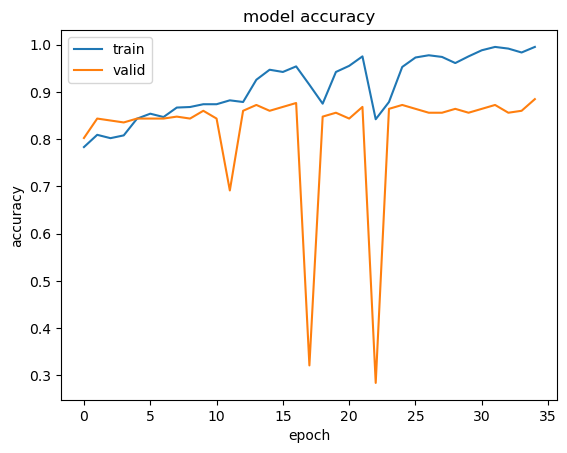

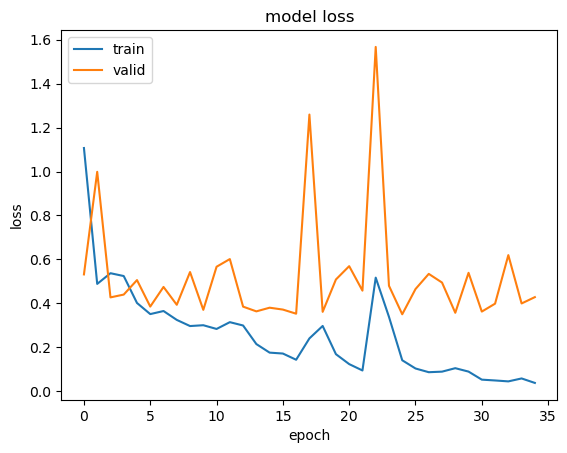

In [44]:
dense_model = keras.models.Sequential([
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
],name="Dense")

history = compile_and_fit(dense_model, X_train, y_train, X_valid, y_valid)
dense_model.save('dense_model.keras')

plot_training_loss_accuracy(history)


### Evaluate model

In [45]:
# Evaluate the model
print('\nEvaluate on validation data\n')
multi_val_performance['Dense'] = dense_model.evaluate(X_valid, y_valid)
print('\nEvaluate on training data\n')
multi_train_performance['Dense'] = dense_model.evaluate(X_train, y_train)


Evaluate on validation data

8/8 [==============================] - 0s 5ms/step - loss: 0.3503 - binary_accuracy: 0.8724

Evaluate on training data

27/27 [==============================] - 0s 5ms/step - loss: 0.1023 - binary_accuracy: 0.9929


In [46]:
# Predict
y_pred=dense_model.predict(X_valid)
print(y_pred)
y_pred = (y_pred>0.5)
y_pred

8/8 [==============================] - 0s 5ms/step
[[0.37439948]
 [0.05245491]
 [0.01816966]
 [0.03288306]
 [0.19452064]
 [0.02336029]
 [0.07764497]
 [0.04875457]
 [0.09517273]
 [0.70770586]
 [0.06962088]
 [0.04849304]
 [0.0084131 ]
 [0.25101203]
 [0.08994836]
 [0.06707209]
 [0.01718435]
 [0.00246904]
 [0.02932545]
 [0.0788945 ]
 [0.08654227]
 [0.08274823]
 [0.1158037 ]
 [0.00806223]
 [0.0288932 ]
 [0.02499354]
 [0.09232662]
 [0.01124828]
 [0.19795181]
 [0.01381697]
 [0.42222112]
 [0.22264594]
 [0.09490517]
 [0.13356368]
 [0.26310113]
 [0.09601612]
 [0.10083452]
 [0.09001628]
 [0.04902199]
 [0.07131316]
 [0.03662208]
 [0.05802263]
 [0.10743645]
 [0.73916715]
 [0.04565704]
 [0.04443991]
 [0.2423018 ]
 [0.12083045]
 [0.09450622]
 [0.02757204]
 [0.19710729]
 [0.31083468]
 [0.11263582]
 [0.0281211 ]
 [0.03713083]
 [0.04058139]
 [0.47604862]
 [0.3866318 ]
 [0.0516802 ]
 [0.22959983]
 [0.6382648 ]
 [0.26467243]
 [0.14122842]
 [0.21642506]
 [0.04614554]
 [0.5266921 ]
 [0.11238775]
 [0.0163289

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [47]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1 = f1_score(y_valid, y_pred)
print("F1 score: ", f1)

Accuracy: 87.24%
F1 score:  0.3673469387755102


In [48]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
(tn, fp, fn, tp)


(203, 2, 29, 9)

# XGBoost model

In [49]:
!pip install xgboost
from xgboost import XGBClassifier

## train

In [50]:
# train the model
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

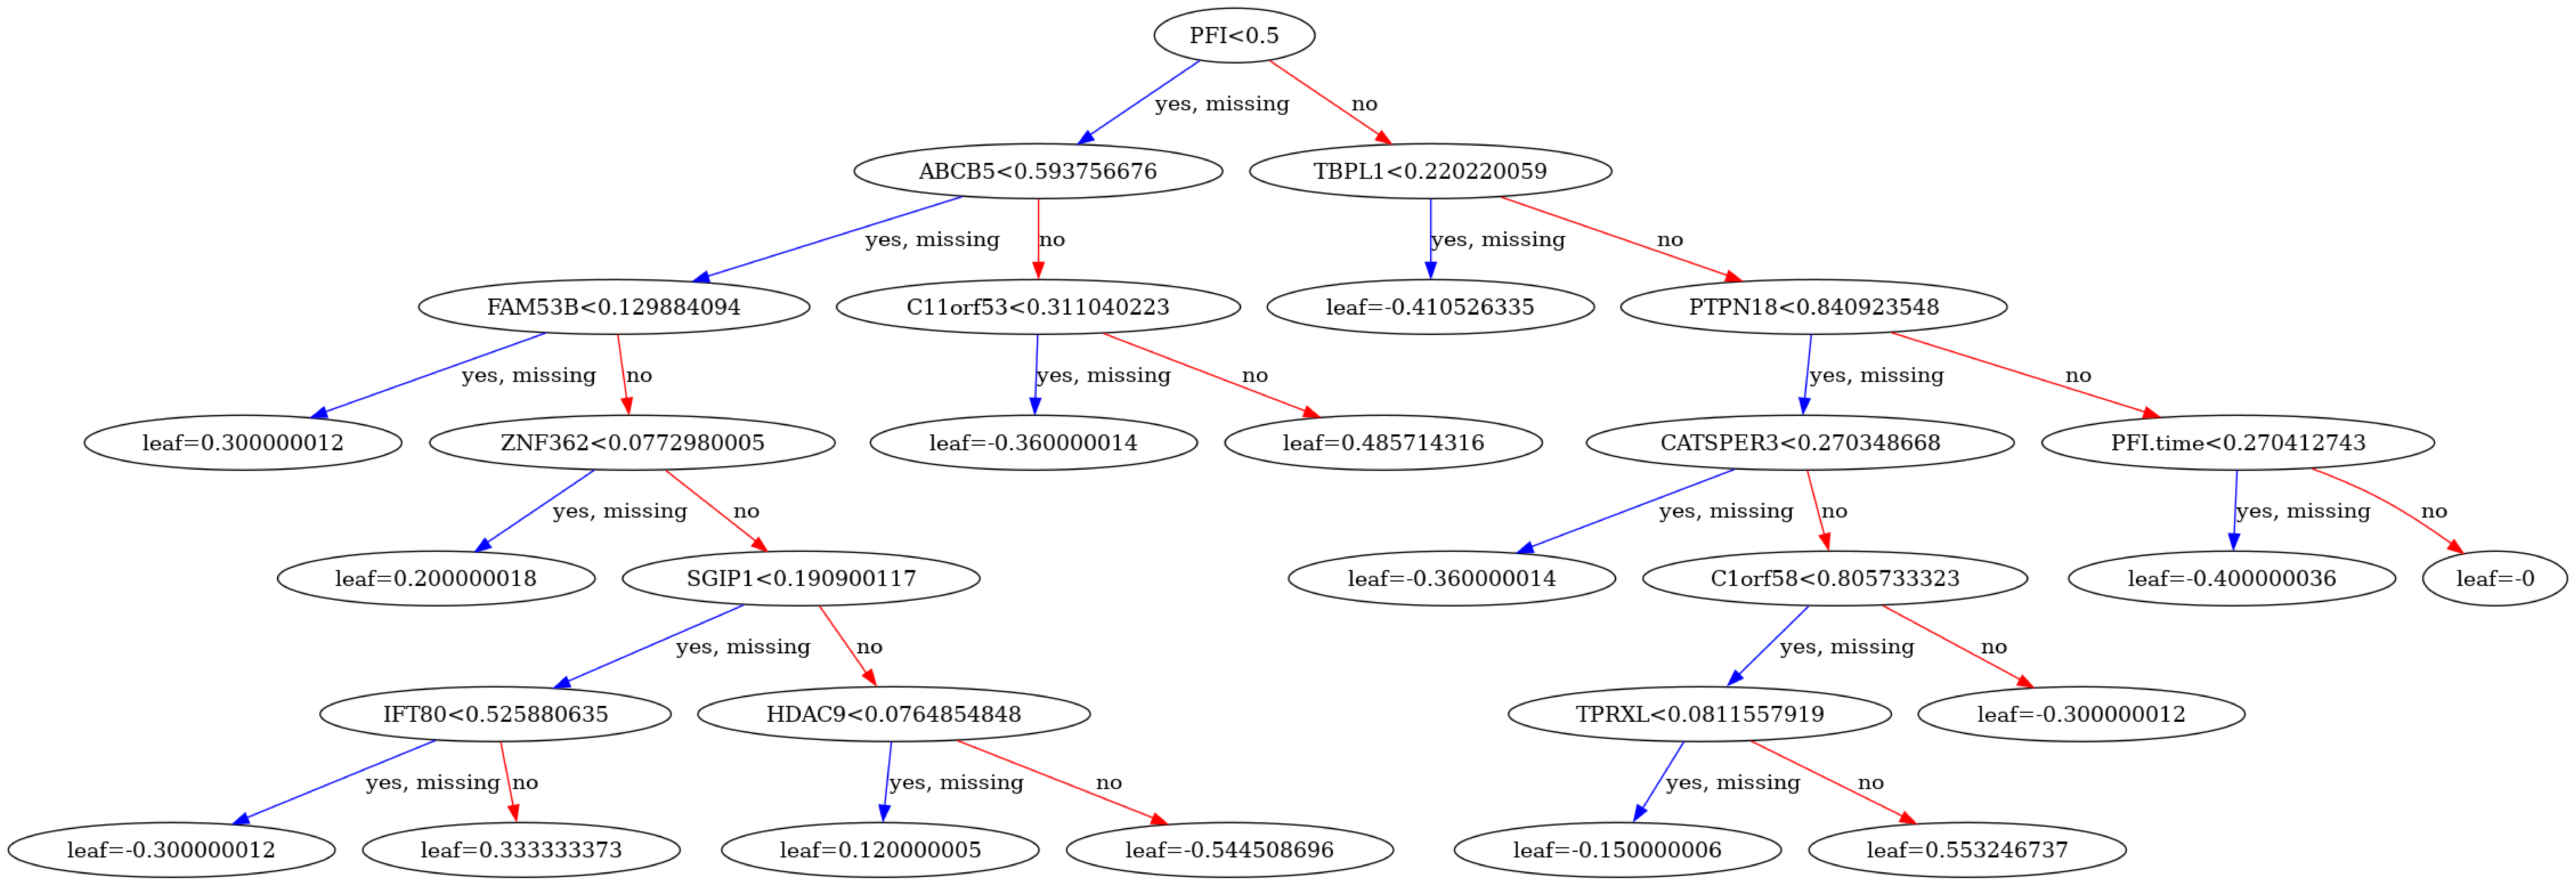

In [51]:
from xgboost import plot_tree
plot_tree(XGBmodel)

fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')


In [52]:
featureImportanceDict = XGBmodel.get_booster().get_score(importance_type='gain')
featureImportanceDict

{'HER2_Final_Status_nature2012_Negative': 0.3599128723144531,
 'Node_nature2012_N1': 0.23206496238708496,
 'age_at_initial_pathologic_diagnosis': 1.867816686630249,
 'OS.time': 2.6338491439819336,
 'PFI.time': 0.7288410067558289,
 'LRRTM3': 0.08533770591020584,
 'GRINA': 0.2607460021972656,
 'NUP93': 0.17792266607284546,
 'ZNF646': 0.10452626645565033,
 'OPA1': 0.28195318579673767,
 'GTSE1': 0.16315555572509766,
 'MYO3B': 1.5010223388671875,
 'ATP2A1': 0.0630892738699913,
 'FBXL12': 1.9759957790374756,
 'FBXL15': 0.5027084350585938,
 'SLC35D2': 0.21101656556129456,
 'CHST2': 8.437654495239258,
 'LQK1': 1.1672792434692383,
 'IFT80': 4.700854778289795,
 'IGFBPL1': 0.6742045283317566,
 'UPK2': 0.34697777032852173,
 'SIDT1': 1.2175164222717285,
 'HMG20A': 0.03247201442718506,
 'HMG20B': 7.926704406738281,
 'C4orf19': 2.797311305999756,
 'EFHA1': 1.7967474460601807,
 'RFX3': 6.363374710083008,
 'C15orf28': 0.2361840009689331,
 'QPRT': 0.11129479110240936,
 'FER1L4': 5.419661521911621,
 'ORC

In [53]:
df = pd.DataFrame.from_dict(featureImportanceDict, orient='index', columns=['value'])
df = df.sort_values(by=['value'], ascending=False)
df


,value
ABCB5,20.797117
ADIPOQ,15.963089
CATSPER3,15.053135
TBPL1,14.392185
C7orf31,13.247690
...,...
CD40LG,0.044847
HMG20A,0.032472
SLC25A38,0.013685
NT5C3,0.011340


In [54]:
# make predictions for validation data
y_pred = XGBmodel.predict(X_valid)
predictions = [round(value) for value in y_pred]

In [55]:
# evaluate predictions
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1 = f1_score(y_valid, predictions)
print("F1 score: ", f1)

Accuracy: 91.36%
F1 score:  0.6666666666666667


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, predictions)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(201, 4, 17, 21)

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


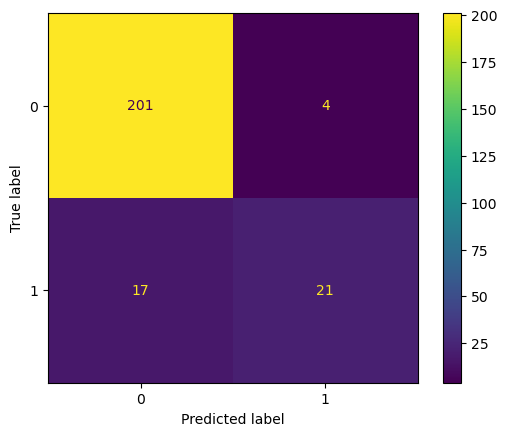

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [59]:
# clustering which group genes and/or samples together based on the similarity of their gene expression pattern

In [60]:
# join data